<a href="https://colab.research.google.com/github/dhara-parikh/The_Sparks_Foundation/blob/master/Task3_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="navy"><center><h1 style='font-size:200; font-weight:bold'> Grip At the Sparks Foundation</h1></center></font>

<font color='blue'><h3 style="color:#0066cc">Name : Dhara BharatKumar Parikh <h3></font>

 # Task 3 --> Exploratory Data Analysis - Retail

<h3>Dataset</h3>
Link - https://bit.ly/3i4rbWl

<h3>Description</h3>


*   Sepal Length(cm)
*   Petal Length(cm)
*   Petal Length(cm)
*   Petal Width(cm)
*   Species


## 1. Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib.inline

## 2. Importing Dataset

In [ ]:
df = pd.read_csv('SampleSuperstore.csv')

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 3. Data Preprocessing

In [ ]:
df.shape

(9994, 13)

In [ ]:
print("Keys of Dataset : \n{}".format(df.keys()))

Keys of Dataset : 
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


As Null values are not allowed. So, we need to see that there should not be any null values present in the Dataset

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.Segment.value_counts()/len(df)*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

From above we can see that maximum Segment was delivered to Consumer

## 4. Data Visualization

### Visualizing Corelation Matrix

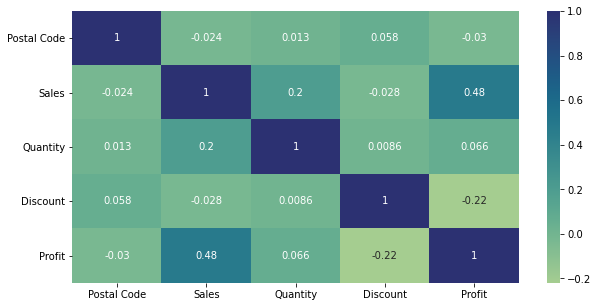

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='crest', annot=True)

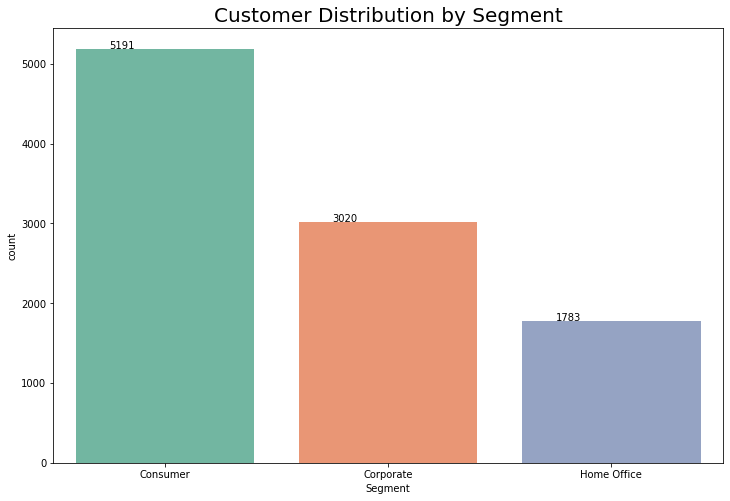

In [ ]:
# What is the distribution of our customer segment
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x='Segment', data = df, ax=ax, palette="Set2")
plt.title('Customer Distribution by Segment', fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=0)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Segment is Categorical with 3 levels - Consumer, Corporate and Home Office. The distribution is highest in Consumer.

### Superstore Category Visualization

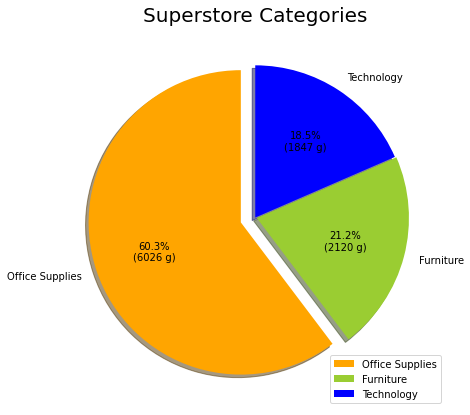

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
colors = ['orange','yellowgreen','blue']

# Creating autopct arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

ax.pie(df['Category'].value_counts(), autopct=lambda pct: func(pct, df['Category'].value_counts()),explode=(0.1,0.01,0.0), 
       labels=list(df['Category'].value_counts().index),shadow=True, startangle=90,colors=colors)
plt.title('Superstore Categories', fontsize=20)
ax.legend()

This pie Chart represents that superstore has more Office Suppliers than Technology and Furniture 




## Visualizing Sub-Category

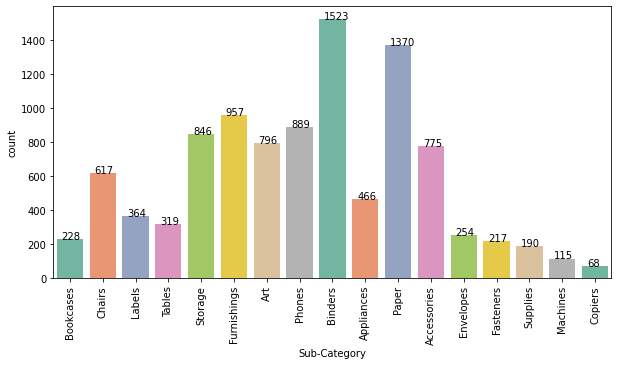

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
p = sns.countplot(x='Sub-Category', data=df, palette='Set2')
p.set_xticklabels(p.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

This graph shows that store has wide variety of Office Suppliers especially in Binders and paper Department

### Visualizing the how much prodcuts distributed regionwise

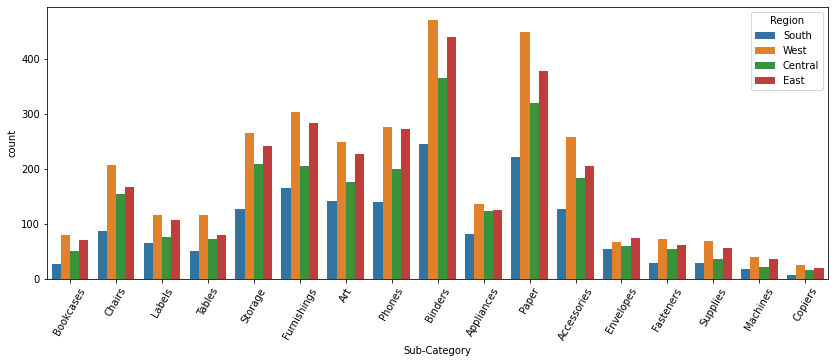

In [ ]:
plt.figure(figsize=(14,5))
p = sns.countplot(data=df, x='Sub-Category', hue='Region')
p.set_xticklabels(p.get_xticklabels(), rotation=60)
plt.show()

From above plot, We can see that Binders and Papers are sold more in West Region

### Visualization of Cost

In [ ]:
# Finding Cost from Profit and Sales
df['Cost']=df['Sales']-df['Profit']
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


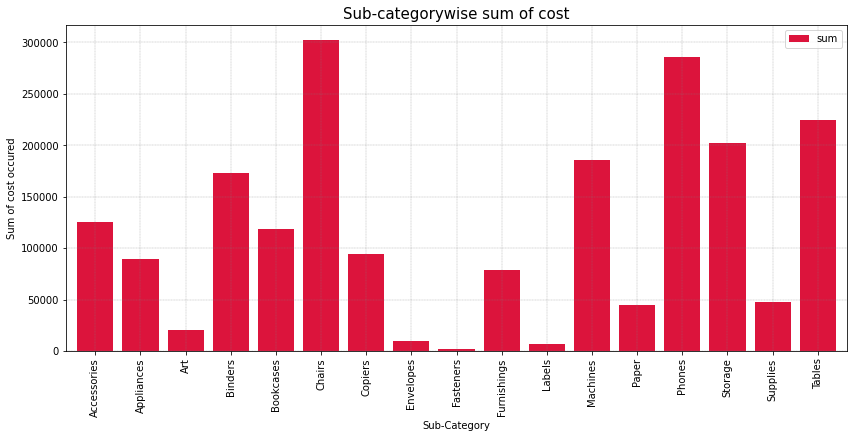

In [ ]:
cost_occured = df.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8, figsize=(14,6),color='crimson')
plt.title('Sub-categorywise sum of cost',fontsize = 15)
plt.ylabel("Sum of cost occured")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

From above Visualization it can be seen that Retailers spending more cost chairs and Phones.

### Visualization of total sales by sub- category

Text(0.5, 0, 'SubCategory')

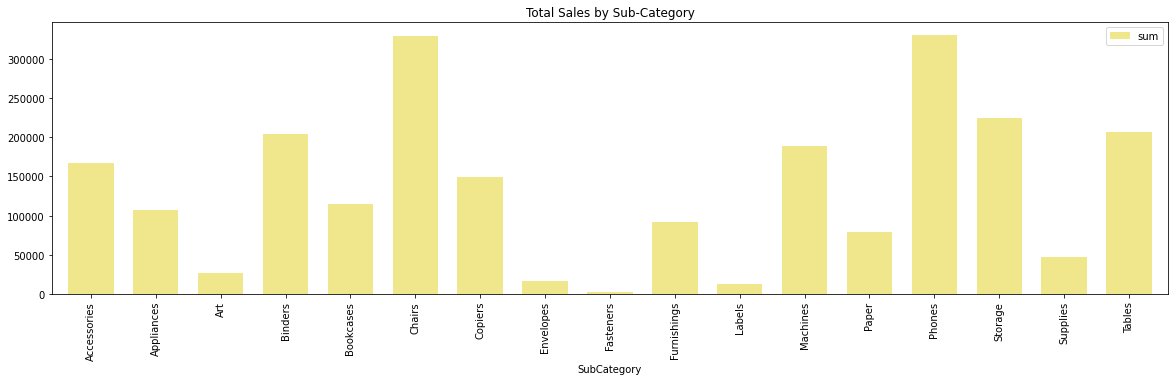

In [ ]:
sales_occured = df.groupby('Sub-Category')['Sales'].agg(['sum'])
sales_occured.plot.bar(width=0.7,color='khaki',figsize=(20,5))       
plt.title('Total Sales by Sub-Category')                           
plt.xlabel('SubCategory')

The graph represents the highest total sale in Phones and chair, means most of the people buy phones and chair from this store.

### Finding Profit %

In [ ]:
df['Profit%'] = (df['Profit']/df['Cost'])*100
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,21.1452,19.402985
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,76.3268,20.481928
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,239.1828,8.108108
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,16.2800,81.818182


In [ ]:
df.sort_values(['Profit%','Sub-Category'], ascending=False).groupby('Profit%').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


From above it can be seen that Retailers selling Phones and Paper having 100% Profit